# ============================================================
# File Name: feature_analysis.ipynb
# Description:
#   This notebook performs a structured feature analysis workflow,
#   including library imports, exploratory steps, and code-driven evaluations.
#
# Purpose:
#   To analyze and understand the behavior, relevance, and structure of features
#   within a dataset as part of a broader data exploration or modeling pipeline.
#
# Challenges:
#   Organizing the analysis workflow into clean, traceable sections
#   and ensuring each step provides meaningful insights into the data.
# ============================================================


In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported.")

Libraries imported.


In [2]:
# Load the diabetes dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
display(df.head())

print(f"\nDataset Info:")
df.info()

print(f"\nBasic Statistics:")
display(df.describe())

print(f"\nMissing Values:")
display(df.isnull().sum())

print(f"\nTarget Variable Distribution:")
display(df['diabetes'].value_counts())

Dataset shape: (100000, 9)

First few rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Basic Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000



Missing Values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Target Variable Distribution:


diabetes
0    91500
1     8500
Name: count, dtype: int64

In [3]:
print("="*80)
print("COLUMN ANALYSIS")
print("="*80)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Type: {df[col].dtype}")
    print(f"  Unique values: {df[col].nunique()}")
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(f"  Values: {df[col].unique()}")

COLUMN ANALYSIS

gender:
  Type: object
  Unique values: 3
  Values: ['Female' 'Male' 'Other']

age:
  Type: float64
  Unique values: 102

hypertension:
  Type: int64
  Unique values: 2
  Values: [0 1]

heart_disease:
  Type: int64
  Unique values: 2
  Values: [1 0]

smoking_history:
  Type: object
  Unique values: 6
  Values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

bmi:
  Type: float64
  Unique values: 4247

HbA1c_level:
  Type: float64
  Unique values: 18
  Values: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]

blood_glucose_level:
  Type: int64
  Unique values: 18
  Values: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]

diabetes:
  Type: int64
  Unique values: 2
  Values: [0 1]


In [4]:
target_col = 'diabetes'

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"Target Column: {target_col}")
print(f"\nCategorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")

Target Column: diabetes

Categorical Columns (2): ['gender', 'smoking_history']

Numerical Columns (6): ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [ ]:
print("="*80)
print("STEP 1: ENCODING CATEGORICAL VARIABLES")
print("="*80)

# Create a copy for processing
df_processed = df.copy()

# Initialize dictionary to store encoders
label_encoders = {}
encoding_map = {}

# Encode each categorical column
for col in categorical_cols:
    print(f"\nEncoding {col}...")
    print(f"  Original values: {df[col].unique()}")
    
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    
    # Store mapping
    encoding_map[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"  Encoded mapping: {encoding_map[col]}")

print("\nCategorical encoding done")
print(f"Encoded {len(categorical_cols)} columns")


STEP 1: ENCODING CATEGORICAL VARIABLES

Encoding gender...
  Original values: ['Female' 'Male' 'Other']
  Encoded mapping: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}

Encoding smoking_history...
  Original values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
  Encoded mapping: {'No Info': np.int64(0), 'current': np.int64(1), 'ever': np.int64(2), 'former': np.int64(3), 'never': np.int64(4), 'not current': np.int64(5)}

Categorical encoding done
Encoded 2 columns


In [6]:
print("="*80)
print("STEP 2: SEPARATING FEATURES AND TARGET")
print("="*80)

# Separate features (X) and target (y)
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nTarget distribution:")
display(y.value_counts())
display(y.value_counts(normalize=True))

print("\nDone")

STEP 2: SEPARATING FEATURES AND TARGET
Features (X) shape: (100000, 8)
Target (y) shape: (100000,)

Target distribution:


diabetes
0    91500
1     8500
Name: count, dtype: int64

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


Done


In [7]:
print("="*80)
print("STEP 3: FEATURE SCALING")
print("="*80)

# Identify numerical columns to scale
numerical_to_scale = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columns to scale ({len(numerical_to_scale)}):")
for col in numerical_to_scale:
    print(f"  - {col}: mean={X[col].mean():.2f}, std={X[col].std():.2f}")

# Initialize and fit scaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_to_scale] = scaler.fit_transform(X[numerical_to_scale])

print(f"\nScaling done!")
print(f"\nAfter scaling:")
for col in numerical_to_scale[:3]:  # Show first 3 as examples
    print(f"  - {col}: mean={X_scaled[col].mean():.2f}, std={X_scaled[col].std():.2f}")

# Store feature names for later
feature_names = X_scaled.columns.tolist()
print(f"\nTotal features: {len(feature_names)}")

STEP 3: FEATURE SCALING
Columns to scale (8):
  - gender: mean=0.41, std=0.49
  - age: mean=41.89, std=22.52
  - hypertension: mean=0.07, std=0.26
  - heart_disease: mean=0.04, std=0.19
  - smoking_history: mean=2.18, std=1.89
  - bmi: mean=27.32, std=6.64
  - HbA1c_level: mean=5.53, std=1.07
  - blood_glucose_level: mean=138.06, std=40.71

Scaling done!

After scaling:
  - gender: mean=0.00, std=1.00
  - age: mean=0.00, std=1.00
  - hypertension: mean=0.00, std=1.00

Total features: 8


In [8]:
print("="*80)
print("STEP 4: CREATING TRAIN/VALIDATION/TEST SPLITS")
print("="*80)

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, 
    test_size=0.30, 
    random_state=42, 
    stratify=y
)

# Second split: 15% validation, 15% test (50/50 of the 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.50, 
    random_state=42, 
    stratify=y_temp
)

print(f"Original dataset: {len(X_scaled)} samples")
print(f"\nTraining set:   {len(X_train):>6} samples ({len(X_train)/len(X_scaled)*100:>5.1f}%)")
print(f"Validation set: {len(X_val):>6} samples ({len(X_val)/len(X_scaled)*100:>5.1f}%)")
print(f"Test set:       {len(X_test):>6} samples ({len(X_test)/len(X_scaled)*100:>5.1f}%)")

print(f"\nSplit done")

# Verify stratification
print("\nTarget distribution in each set:")
print(f"Train:      {y_train.value_counts(normalize=True).to_dict()}")
print(f"Validation: {y_val.value_counts(normalize=True).to_dict()}")
print(f"Test:       {y_test.value_counts(normalize=True).to_dict()}")

STEP 4: CREATING TRAIN/VALIDATION/TEST SPLITS
Original dataset: 100000 samples

Training set:    70000 samples ( 70.0%)
Validation set:  15000 samples ( 15.0%)
Test set:        15000 samples ( 15.0%)

Split done

Target distribution in each set:
Train:      {0: 0.915, 1: 0.085}
Validation: {0: 0.915, 1: 0.085}
Test:       {0: 0.915, 1: 0.085}


In [9]:
print("="*80)
print("STEP 5: FEATURE ENGINEERING")
print("="*80)

def create_engineered_features(df):
    """
    Create new features based on domain knowledge
    """
    df_eng = df.copy()
    created_features = []
    
    # BMI-based features
    if 'bmi' in df_eng.columns:
        # BMI categories: 0=underweight, 1=normal, 2=overweight, 3=obese
        df_eng['bmi_category'] = pd.cut(df_eng['bmi'], 
                                        bins=[0, 18.5, 25, 30, 100],
                                        labels=[0, 1, 2, 3]).astype(float)
        df_eng['is_obese'] = (df_eng['bmi'] > 30).astype(int)
        created_features.extend(['bmi_category', 'is_obese'])
    
    # Age-based features
    if 'age' in df_eng.columns:
        # Age groups: 0=young, 1=middle, 2=senior, 3=elderly
        df_eng['age_group'] = pd.cut(df_eng['age'],
                                     bins=[0, 30, 45, 60, 100],
                                     labels=[0, 1, 2, 3]).astype(float)
        df_eng['is_senior'] = (df_eng['age'] > 60).astype(int)
        created_features.extend(['age_group', 'is_senior'])
    
    # Interaction features
    if 'bmi' in df_eng.columns and 'age' in df_eng.columns:
        df_eng['bmi_age_interaction'] = df_eng['bmi'] * df_eng['age']
        created_features.append('bmi_age_interaction')
    
    if 'HbA1c_level' in df_eng.columns and 'blood_glucose_level' in df_eng.columns:
        df_eng['glucose_hba1c_ratio'] = df_eng['blood_glucose_level'] / (df_eng['HbA1c_level'] + 1)
        created_features.append('glucose_hba1c_ratio')
    
    # Cardiovascular risk
    if 'hypertension' in df_eng.columns and 'heart_disease' in df_eng.columns:
        df_eng['cardiovascular_risk'] = df_eng['hypertension'] + df_eng['heart_disease']
        created_features.append('cardiovascular_risk')
    
    return df_eng, created_features

# Apply feature engineering to all splits
print("Creating engineered features...")
X_train_eng, new_features = create_engineered_features(X_train)
X_val_eng, _ = create_engineered_features(X_val)
X_test_eng, _ = create_engineered_features(X_test)

print(f"\nfeature engineering done")
print(f"Created {len(new_features)} new features:")
for feat in new_features:
    print(f"  - {feat}")

# Scale the new features
if new_features:
    print(f"\nScaling new features...")
    scaler_new = StandardScaler()
    X_train_eng[new_features] = scaler_new.fit_transform(X_train_eng[new_features])
    X_val_eng[new_features] = scaler_new.transform(X_val_eng[new_features])
    X_test_eng[new_features] = scaler_new.transform(X_test_eng[new_features])
    print("new features scaled")

print(f"\nOriginal features: {X_train.shape[1]}")
print(f"Total features after engineering: {X_train_eng.shape[1]}")

STEP 5: FEATURE ENGINEERING
Creating engineered features...

feature engineering done
Created 7 new features:
  - bmi_category
  - is_obese
  - age_group
  - is_senior
  - bmi_age_interaction
  - glucose_hba1c_ratio
  - cardiovascular_risk

Scaling new features...
new features scaled

Original features: 8
Total features after engineering: 15


In [10]:
print("="*80)
print("STEP 6: FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Train a Random Forest to calculate feature importance
print("Training Random Forest for feature importance...")
rf_importance = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1
)
rf_importance.fit(X_train_eng, y_train)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_eng.columns,
    'importance': rf_importance.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

# Add cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

print(f"\Done")
print(f"\nTop 15 Most Important Features:")
display(feature_importance.head(15))

# Find how many features needed for 95% cumulative importance
features_for_95 = (feature_importance['cumulative_importance'] < 0.95).sum() + 1
print(f"\nFeatures needed for 95% cumulative importance: {features_for_95}")

STEP 6: FEATURE IMPORTANCE ANALYSIS
Training Random Forest for feature importance...
\Done

Top 15 Most Important Features:


,feature,importance,cumulative_importance
0,HbA1c_level,0.350053,0.350053
1,blood_glucose_level,0.262435,0.612489
2,glucose_hba1c_ratio,0.090193,0.702682
3,bmi_age_interaction,0.078366,0.781048
4,bmi,0.076882,0.857929
5,age,0.072916,0.930845
6,smoking_history,0.026511,0.957356
7,cardiovascular_risk,0.019179,0.976535
8,hypertension,0.010006,0.986542
9,gender,0.007405,0.993947



Features needed for 95% cumulative importance: 7


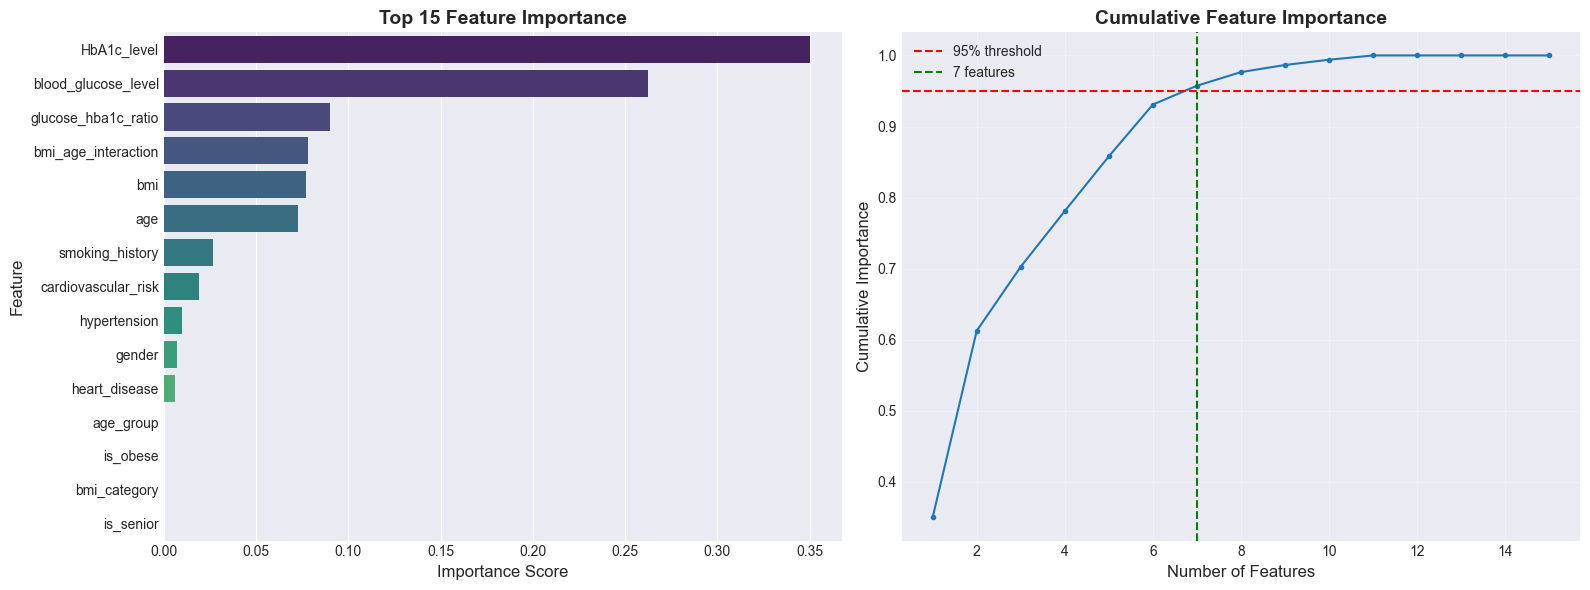

feature importance plot saved as 'feature_importance.png'


In [11]:
# Create feature importance visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 features bar plot
top_n = 15
sns.barplot(
    data=feature_importance.head(top_n), 
    x='importance', 
    y='feature', 
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title(f'Top {top_n} Feature Importance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance Score', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)

# Cumulative importance plot
axes[1].plot(range(1, len(feature_importance)+1), 
             feature_importance['cumulative_importance'], 
             marker='o', markersize=3)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1].axvline(x=features_for_95, color='g', linestyle='--', 
                label=f'{features_for_95} features')
axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Features', fontsize=12)
axes[1].set_ylabel('Cumulative Importance', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("feature importance plot saved as 'feature_importance.png'")

In [12]:
print("="*80)
print("STEP 7: FEATURE SELECTION")
print("="*80)

# Method 1: Keep features with importance > threshold
importance_threshold = 0.01
selected_features_threshold = feature_importance[
    feature_importance['importance'] > importance_threshold
]['feature'].tolist()

print(f"Method 1: Importance threshold > {importance_threshold}")
print(f"  Selected features: {len(selected_features_threshold)}")
print(f"  Removed features: {X_train_eng.shape[1] - len(selected_features_threshold)}")

# Method 2: Keep top N features
top_n_features = 15
selected_features_topn = feature_importance.head(top_n_features)['feature'].tolist()

print(f"\nMethod 2: Top {top_n_features} features")
print(f"  Selected features: {len(selected_features_topn)}")
print("  Features:", selected_features_topn)

# Create datasets with selected features (Method 1 - threshold)
X_train_opt = X_train_eng[selected_features_threshold].copy()
X_val_opt = X_val_eng[selected_features_threshold].copy()
X_test_opt = X_test_eng[selected_features_threshold].copy()

# Create datasets with top N features (Method 2)
X_train_topn = X_train_eng[selected_features_topn].copy()
X_val_topn = X_val_eng[selected_features_topn].copy()
X_test_topn = X_test_eng[selected_features_topn].copy()

print(f"\nfeature selection done")
print(f"\nRemoved features:")
removed_features = set(X_train_eng.columns) - set(selected_features_threshold)
for feat in removed_features:
    imp = feature_importance[feature_importance['feature']==feat]['importance'].values[0]
    print(f"  - {feat} (importance: {imp:.6f})")

STEP 7: FEATURE SELECTION
Method 1: Importance threshold > 0.01
  Selected features: 9
  Removed features: 6

Method 2: Top 15 features
  Selected features: 15
  Features: ['HbA1c_level', 'blood_glucose_level', 'glucose_hba1c_ratio', 'bmi_age_interaction', 'bmi', 'age', 'smoking_history', 'cardiovascular_risk', 'hypertension', 'gender', 'heart_disease', 'age_group', 'is_obese', 'bmi_category', 'is_senior']

feature selection done

Removed features:
  - heart_disease (importance: 0.006053)
  - age_group (importance: 0.000000)
  - is_obese (importance: 0.000000)
  - bmi_category (importance: 0.000000)
  - gender (importance: 0.007405)
  - is_senior (importance: 0.000000)


In [13]:
print("="*80)
print("STEP 8: MODEL PERFORMANCE COMPARISON")
print("="*80)

def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    """Train and evaluate a model, return metrics"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    results = {
        'Model': model_name,
        'Features': X_train.shape[1],
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'ROC-AUC': roc_auc_score(y_val, y_pred_proba)
    }
    return results

# Compare different feature sets
results_list = []

print("Training and evaluating models...\n")

# 1. Original features (scaled only)
print("1. Original Features...")
rf1 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
results_list.append(evaluate_model(rf1, X_train, X_val, y_train, y_val, 
                                   "Original Features"))

# 2. With engineered features
print("2. With Engineered Features...")
rf2 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
results_list.append(evaluate_model(rf2, X_train_eng, X_val_eng, y_train, y_val, 
                                   "Engineered Features"))

# 3. Optimized (threshold-based selection)
print("3. Optimized Features (threshold)...")
rf3 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
results_list.append(evaluate_model(rf3, X_train_opt, X_val_opt, y_train, y_val, 
                                   "Optimized (threshold)"))

# 4. Top N features only
print(f"4. Top {top_n_features} Features...")
rf4 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
results_list.append(evaluate_model(rf4, X_train_topn, X_val_topn, y_train, y_val, 
                                   f"Top {top_n_features} Features"))

# Create comparison dataframe
comparison_df = pd.DataFrame(results_list)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
display(comparison_df)

# Find best model
best_idx = comparison_df['F1'].idxmax()
best_model = comparison_df.loc[best_idx, 'Model']
best_f1 = comparison_df.loc[best_idx, 'F1']

print(f"\nTop performing model: {best_model}")
print(f"   F1 Score: {best_f1:.4f}")
print(f"   Features used: {comparison_df.loc[best_idx, 'Features']:.0f}")

STEP 8: MODEL PERFORMANCE COMPARISON
Training and evaluating models...

1. Original Features...
2. With Engineered Features...
3. Optimized Features (threshold)...
4. Top 15 Features...

MODEL COMPARISON RESULTS


,Model,Features,Accuracy,Precision,Recall,F1,ROC-AUC
0,Original Features,8,0.971533,0.945378,0.705882,0.808262,0.964525
1,Engineered Features,15,0.971600,0.948258,0.704314,0.808281,0.964697
2,Optimized (threshold),9,0.970467,0.925358,0.709804,0.803373,0.964717
3,Top 15 Features,15,0.971933,0.950422,0.706667,0.810616,0.966506



Top performing model: Top 15 Features
   F1 Score: 0.8106
   Features used: 15


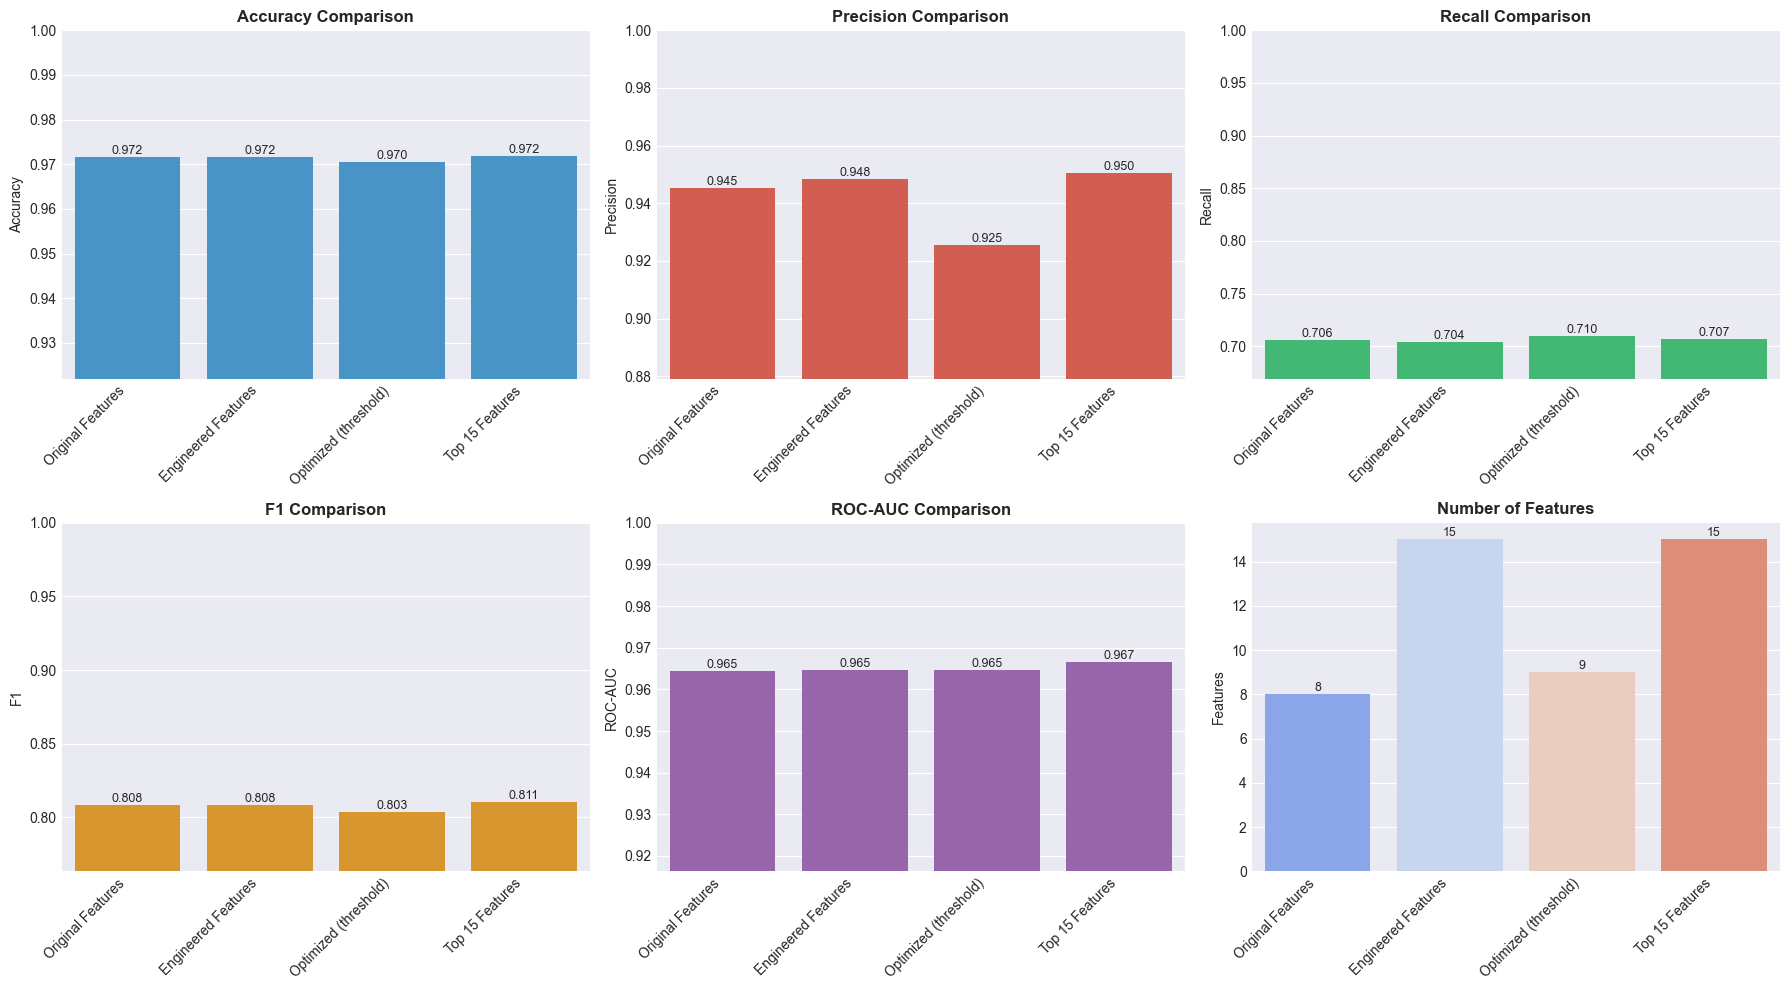

model comparison plot saved as 'model_comparison.png'


In [14]:
# Create comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    sns.barplot(
        data=comparison_df, 
        x='Model', 
        y=metric, 
        ax=ax,
        palette=[colors[idx]]
    )
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylim([comparison_df[metric].min()*0.95, 1.0])
    ax.set_xlabel('')
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=9)

# Feature count comparison
ax = axes[1, 2]
sns.barplot(
    data=comparison_df, 
    x='Model', 
    y='Features', 
    ax=ax,
    palette='coolwarm'
)
ax.set_title('Number of Features', fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("model comparison plot saved as 'model_comparison.png'")

In [15]:
print("="*80)
print("SELECTING BEST CONFIGURATION")
print("="*80)

# Determine which dataset to use based on best performance
if best_idx == 0:
    final_X_train = X_train
    final_X_val = X_val
    final_X_test = X_test
    selected_features_final = feature_names
elif best_idx == 1:
    final_X_train = X_train_eng
    final_X_val = X_val_eng
    final_X_test = X_test_eng
    selected_features_final = X_train_eng.columns.tolist()
elif best_idx == 2:
    final_X_train = X_train_opt
    final_X_val = X_val_opt
    final_X_test = X_test_opt
    selected_features_final = selected_features_threshold
else:
    final_X_train = X_train_topn
    final_X_val = X_val_topn
    final_X_test = X_test_topn
    selected_features_final = selected_features_topn

print(f"   Selected configuration: {best_model}")
print(f"   Total features: {len(selected_features_final)}")
print(f"   Training samples: {len(final_X_train)}")
print(f"   Validation samples: {len(final_X_val)}")
print(f"   Test samples: {len(final_X_test)}")

print(f"\nFinal feature list:")
for i, feat in enumerate(selected_features_final, 1):
    print(f"  {i:2d}. {feat}")

SELECTING BEST CONFIGURATION
   Selected configuration: Top 15 Features
   Total features: 15
   Training samples: 70000
   Validation samples: 15000
   Test samples: 15000

Final feature list:
   1. HbA1c_level
   2. blood_glucose_level
   3. glucose_hba1c_ratio
   4. bmi_age_interaction
   5. bmi
   6. age
   7. smoking_history
   8. cardiovascular_risk
   9. hypertension
  10. gender
  11. heart_disease
  12. age_group
  13. is_obese
  14. bmi_category
  15. is_senior


In [17]:
print("="*80)
print("SAVING PROCESSED DATA")
print("="*80)

# Save processed datasets as CSV
final_X_train.to_csv('X_train.csv', index=False)
final_X_val.to_csv('X_val.csv', index=False)
final_X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False, header=True)
y_val.to_csv('y_val.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)

print("  Saved CSV files:")
print("  - X_train.csv")
print("  - X_val.csv")
print("  - X_test.csv")
print("  - y_train.csv")
print("  - y_val.csv")
print("  - y_test.csv")

# Save preprocessing objects
preprocessing_objects = {
    'scaler': scaler,
    'label_encoders': label_encoders,
    'encoding_map': encoding_map,
    'feature_names': selected_features_final,
    'selected_features': selected_features_final,
    'feature_importance': feature_importance,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'best_model_config': best_model
}

with open('preprocessing_objects.pkl', 'wb') as f:
    pickle.dump(preprocessing_objects, f)

print("\n Saved preprocessing objects:")
print("  - preprocessing_objects.pkl")

SAVING PROCESSED DATA
  Saved CSV files:
  - X_train.csv
  - X_val.csv
  - X_test.csv
  - y_train.csv
  - y_val.csv
  - y_test.csv

 Saved preprocessing objects:
  - preprocessing_objects.pkl


In [18]:
print("="*80)
print("GENERATING DOCUMENTATION")
print("="*80)

documentation = f"""
# DATA PREPROCESSING PIPELINE DOCUMENTATION
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

## 1. DATASET OVERVIEW
- Original shape: {df.shape}
- Total features: {df.shape[1]}
- Total samples: {df.shape[0]:,}
- Target variable: {target_col}
- Target distribution:
  Class 0: {(y==0).sum():,} ({(y==0).mean()*100:.1f}%)
  Class 1: {(y==1).sum():,} ({(y==1).mean()*100:.1f}%)

## 2. CATEGORICAL ENCODING
Categorical variables encoded: {len(categorical_cols)}
Encoding method: Label Encoding

{chr(10).join([f"- {col}: {mapping}" for col, mapping in encoding_map.items()])}

## 3. FEATURE SCALING
- Method: StandardScaler (z-score normalization)
- Features scaled: {len(numerical_cols)}
- Scaled columns: {', '.join(numerical_cols)}

## 4. DATA SPLITS
Split ratio: 70% / 15% / 15%
- Training set: {len(X_train):,} samples (70.0%)
- Validation set: {len(X_val):,} samples (15.0%)
- Test set: {len(X_test):,} samples (15.0%)
- Stratification: Yes (maintains target distribution)

## 5. FEATURE ENGINEERING
New features created: {len(new_features) if 'new_features' in locals() else 0}
{chr(10).join([f"- {feat}" for feat in (new_features if 'new_features' in locals() else [])])}

Engineering rationale:
- BMI categories: Clinical thresholds for obesity classification
- Age groups: Risk factors increase with age
- Interaction terms: Combined effects of multiple risk factors
- Binary indicators: Simplified high-risk flags
- Ratios: Relative glucose control indicators

## 6. FEATURE IMPORTANCE
Total features analyzed: {len(feature_importance)}

Top 10 most important features:
{chr(10).join([f"{i+1:2d}. {row['feature']:30s} - {row['importance']:.6f}" for i, row in feature_importance.head(10).iterrows()])}

## 7. FEATURE SELECTION
- Selection method: Importance threshold > {importance_threshold}
- Original features: {X_train_eng.shape[1]}
- Selected features: {len(selected_features_final)}
- Features removed: {X_train_eng.shape[1] - len(selected_features_final)}

## 8. MODEL PERFORMANCE COMPARISON

{comparison_df.to_string(index=False)}

Best configuration: {best_model}
- F1 Score: {best_f1:.4f}
- Features: {len(selected_features_final)}

## 9. KEY INSIGHTS
- Most important feature: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.4f})
- Feature engineering impact: {'+' if comparison_df.loc[1, 'F1'] > comparison_df.loc[0, 'F1'] else '-'}{abs(comparison_df.loc[1, 'F1'] - comparison_df.loc[0, 'F1']):.4f} F1 score change
- Optimal feature count: {len(selected_features_final)}
- Features needed for 95% importance: {features_for_95}

## 10. RECOMMENDATIONS FOR MODEL TRAINING
Use {best_model} feature configuration
Total features: {len(selected_features_final)}
Hyperparameters to tune:
   - n_estimators (100, 200, 300)
   - max_depth (10, 20, 30, None)
   - min_samples_split (2, 5, 10)
   - min_samples_leaf (1, 2, 4)

Models to try:
   - Random Forest
   - XGBoost
   - Gradient Boosting
   - Logistic Regression (baseline)
   - Neural Network (if time permits)

Validation strategy:
   - Use validation set for hyperparameter tuning
   - Save test set for final evaluation only
   - Monitor for overfitting

## 11. FILES GENERATED
- X_train.csv, X_val.csv, X_test.csv (feature data)
- y_train.csv, y_val.csv, y_test.csv (target labels)
- preprocessing_objects.pkl (scalers and encoders)
- feature_importance.png (visualization)
- model_comparison.png (performance comparison)
- preprocessing_documentation.txt (this file)

## 12. NEXT STEPS FOR TEAM
1. Model Developer: Load CSV files and train multiple models
2. Evaluation Specialist: Use validation set to compare models
3. All: Reserve test set for final evaluation only
4. Presentation Lead: Use visualizations in slides
5. Documentation Lead: Reference this file for methodology section
"""

# Save documentation
with open('preprocessing_documentation.txt', 'w') as f:
    f.write(documentation)

print("Documentation saved as 'preprocessing_documentation.txt'")
print("\nDocumentation preview:")
print("="*80)
print(documentation[:1500] + "\n...\n(see full file for complete documentation)")

GENERATING DOCUMENTATION
Documentation saved as 'preprocessing_documentation.txt'

Documentation preview:

# DATA PREPROCESSING PIPELINE DOCUMENTATION
Generated: 2025-11-09 09:37:51

## 1. DATASET OVERVIEW
- Original shape: (100000, 9)
- Total features: 9
- Total samples: 100,000
- Target variable: diabetes
- Target distribution:
  Class 0: 91,500 (91.5%)
  Class 1: 8,500 (8.5%)

## 2. CATEGORICAL ENCODING
Categorical variables encoded: 2
Encoding method: Label Encoding

- gender: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
- smoking_history: {'No Info': np.int64(0), 'current': np.int64(1), 'ever': np.int64(2), 'former': np.int64(3), 'never': np.int64(4), 'not current': np.int64(5)}

## 3. FEATURE SCALING
- Method: StandardScaler (z-score normalization)
- Features scaled: 6
- Scaled columns: age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level

## 4. DATA SPLITS
Split ratio: 70% / 15% / 15%
- Training set: 70,000 samples (70.0%)
- Validation se